## SWOT Level 3 Altimetry Data Processing

### Open the downloaded data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import glob

In [2]:
!ls /home/jovyan/shared/cycle_500

SWOT_L3_LR_SSH_Basic_500_001_20230423T175831_20230423T184936_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_002_20230423T184937_20230423T194041_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_003_20230423T194042_20230423T203147_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_004_20230423T203148_20230423T212253_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_005_20230423T212253_20230423T221358_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_006_20230423T221359_20230423T230504_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_007_20230423T230505_20230423T235610_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_008_20230423T235610_20230424T004715_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_009_20230424T004716_20230424T013821_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_010_20230424T013822_20230424T022926_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_011_20230424T022927_20230424T032033_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_012_20230424T032033_20230424T041138_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_013_20230424T041139_20230424T050244_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_014_20230424T050245_20230424T055350_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_015_20230

In [3]:
data_dir = '/home/jovyan/shared/cycle_500/*'
data_files = glob.glob(data_dir)

### Visualize absolute dynamic topography for the first record

In [4]:
ds = xr.open_dataset(data_files[-2])
ds2=ds.drop_dims('num_nadir')

In [5]:
ds2['ssha'].min(), ds2['ssha'].max()

(<xarray.DataArray 'ssha' ()> Size: 8B
 array(-0.1663),
 <xarray.DataArray 'ssha' ()> Size: 8B
 array(0.3608))

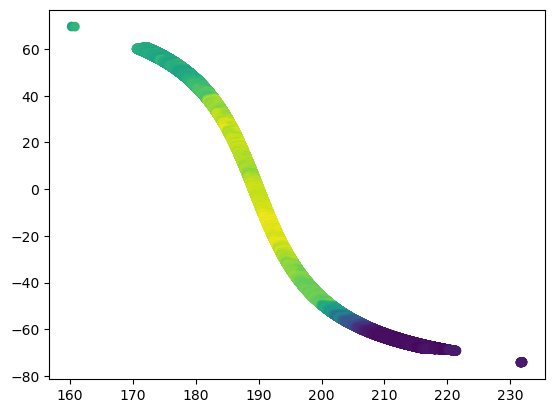

In [7]:
plt.scatter(
    ds2['longitude'],
    ds2['latitude'],
    c=ds2['ssha']+ds2['mdt'],
)

In [8]:
ds2['ssha']

<xarray.DataArray 'ssha' (num_lines: 9860, num_pixels: 69)> Size: 5MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    latitude   (num_lines, num_pixels) float64 5MB 78.27 78.25 ... -78.25 -78.27
    longitude  (num_lines, num_pixels) float64 5MB 106.1 106.1 ... 273.0 273.0
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:      sea surface height anomaly
    standard_name:  sea_surface_height_above_reference_ellipsoid
    comment:        Height of the sea surface anomaly with all corrections ap...
    units:          m

In [9]:
def preprocess(ds):
  ds = ds.set_coords('time')
  ds = ds.swap_dims({'num_lines':'time'})
  ds = ds.drop_dims('num_nadir')
  return ds

swot_full = xr.open_mfdataset(data_files, 
                         preprocess=preprocess, 
                         combine='nested',
                         concat_dim='time')


### can't drop the nadir dimension, only empty in the last file, which shouldn't be used

In [10]:
swot_full

<xarray.Dataset> Size: 764MB
Dimensions:         (time: 276080, num_pixels: 69)
Coordinates:
  * time            (time) datetime64[ns] 2MB 2023-04-23T19:40:42.660000 ... ...
    latitude        (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    longitude       (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Dimensions without coordinates: num_pixels
Data variables:
    mdt             (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    ssha            (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    ssha_noiseless  (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              1.5e-05
    geospatial_lon_max:              359.999928
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

In [11]:
swot_full['adt'] = swot_full['mdt'] + swot_full['ssha_noiseless']

In [12]:
swot_full

<xarray.Dataset> Size: 917MB
Dimensions:         (time: 276080, num_pixels: 69)
Coordinates:
  * time            (time) datetime64[ns] 2MB 2023-04-23T19:40:42.660000 ... ...
    latitude        (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    longitude       (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Dimensions without coordinates: num_pixels
Data variables:
    mdt             (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    ssha            (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    ssha_noiseless  (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    adt             (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              1.5e-05
    geospatial_lon_max:              359.999928
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

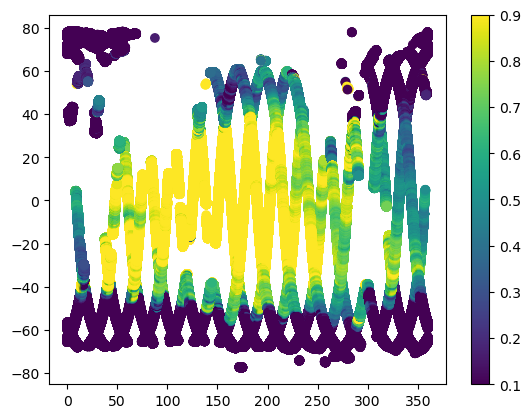

In [13]:
plt.scatter(
    swot_full['longitude'],
    swot_full['latitude'],
    c = swot_full['adt'],
    vmin=.1,
    vmax=.9,
)
plt.colorbar()